<h1 style='color: blue; font-size: 34px; font-weight: bold;'> Projeto Proposto 
</h1>
<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>    
<i> Este projeto baseia-se na criação de um Modelo de Segmentação de Clientes para auxílio no Marketing Digital. </i>       
</p>  

# <font color='red' style='font-size: 40px;'> Problemática </font>
<hr style='border: 2px solid red;'>

<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>    
<i>     Segmentar clientes ajuda empresas a fechar melhores negócios, sendo uma vantagem competitiva frente à concorrência. O objetivo desta estratégia é aumentar a eficiência na atuação da empresa junto aos clientes, reunindo o maior número possível de informações sobre o público-alvo que pretende atingir. Dessa forma, a intensão deste projeto é segmentar os clientes, para que assim possamos enviar informações realmente úteis para a área de Marketing.


</i> 
</p>  

<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>    
<i>     Neste trabalho, usaremos uma simplificação do Banco de Dados da Olist para identificar a frequência, recência e receita dos consumidores e agrupa-los em categorias de compras. Assim podemos fazer campanhas de marketing específicas, além de criar programas de recompensas para os clientes que mais consomem.
</i> 
</p>  





## Etapas

1) Realizar uma Análise Exploratória Univariada

2) Realizar uma Análise Exploratória com base nas Datas 

3) Pré-Processar o DataFrame 

4) Aplicar um Modelo de Clustering sem PCA e um Modelo de Clustering com PCA 

5) Analisar a explicabilidade do modelo com PCA e aplicar testes de hipótese para entender se a diferença é significativa ou não 

6) Consolidar os resultados das análises 

# <font color='red' style='font-size: 40px;'> Bibliotecas Utilizadas </font>
<hr style='border: 2px solid red;'>

In [1]:
## Bibliotecas De Manipulação de Dados e Visualização
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from IPython.display import display, Image

## Bibliotecas de Modelagem Matemática e Estatística
import numpy as np
import scipy as sp 
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Bibliotecas de Manipulação de Tempo
import time
import datetime

# Bibliotecas de Pré-Processamento e Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Bibliotecas de Modelos de Machine Learning
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Bibliotecas de Métricas de Machine Learning
from sklearn.metrics import silhouette_score


# Parâmetros de Otimização
import warnings
%matplotlib inline
sns.set()
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = '14'
plt.rcParams['figure.figsize'] = [10, 5]
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.float_format', lambda x: '%.2f' % x) # Tira os números do formato de Notação Científica
np.set_printoptions(suppress=True) # Tira os números do formato de Notação Científica em Numpy Arrays
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning) # Retira Future Warnings

# <font color='red' style='font-size: 40px;'> Funções </font>
<hr style='border: 2px solid red;'>

## Funções de Visualização

* Plota Barras

In [2]:
def plota_barras(lista_variaveis, hue, df, linhas, colunas):
    if hue != False:
        if (linhas == 1) and (colunas == 1):
            k = 0
            ax = sns.countplot(x = lista_variaveis[k], data = df, orient = 'h', hue = hue, palette={'Yes':'#1FB3E5', 'No':'#696969'})
            ax.set_xlabel(f'{lista_variaveis[k]}', fontsize = 14)
            ax.set_ylabel(f'Quantidade', fontsize = 14)
            total = []
            for bar in ax.patches:
                height = bar.get_height()
                total.append(height)
            total = sum(total)
            
            sizes = []
            for bar in ax.patches:
                height = bar.get_height()
                sizes.append(height)
                ax.text(bar.get_x() + bar.get_width()/1.6,
                        height+200,
                        f'{round((height/total)*100, 2)}%',
                        ha = 'center',
                        fontsize = 12
                )
            ax.set_ylim(0, max(sizes)*1.1)
            plt.show()
        elif linhas == 1:
            fig, axis = plt.subplots(linhas, colunas, figsize=(20, 10), sharey=True)
            k = 0
            for i in np.arange(linhas):
                for j in np.arange(colunas):
                    ax = sns.countplot(x = lista_variaveis[k], data = df, orient = 'h', ax = axis[j], hue = hue, palette={'Yes':'#1FB3E5', 'No':'#696969'})
                    ax.set_xlabel(f'{lista_variaveis[k]}', fontsize = 14)
                    ax.set_ylabel(f'Quantidade', fontsize = 14)
                    total = []
                    for bar in ax.patches:
                        height = bar.get_height()
                        total.append(height)
                    total = sum(total)
                    
                    sizes = []
                    for bar in ax.patches:
                        height = bar.get_height()
                        sizes.append(height)
                        ax.text(bar.get_x() + bar.get_width()/1.6,
                                height+200,
                                f'{round((height/total)*100, 2)}%',
                                ha = 'center',
                                fontsize = 12
                        )
                    ax.set_ylim(0, max(sizes)*1.1)
                    k = k + 1
        elif colunas == 1:
            fig, axis = plt.subplots(linhas, colunas, figsize=(20, 10), sharey=True)
            k = 0
            for i in np.arange(linhas):
                for j in np.arange(colunas):
                    ax = sns.countplot(x = lista_variaveis[k], data = df, orient = 'h', ax = axis[i], hue = hue, palette={'Yes':'#1FB3E5', 'No':'#696969'})
                    ax.set_xlabel(f'{lista_variaveis[k]}', fontsize = 14)
                    ax.set_ylabel(f'Quantidade', fontsize = 14)
                    total = []
                    for bar in ax.patches:
                        height = bar.get_height()
                        total.append(height)
                    total = sum(total)
                    
                    sizes = []
                    for bar in ax.patches:
                        height = bar.get_height()
                        sizes.append(height)
                        ax.text(bar.get_x() + bar.get_width()/1.6,
                                height+200,
                                f'{round((height/total)*100, 2)}%',
                                ha = 'center',
                                fontsize = 12
                        )
                    ax.set_ylim(0, max(sizes)*1.1)
                    k = k + 1
        else: 
            fig, axis = plt.subplots(linhas, colunas, figsize=(20, 10), sharey=True)
            k = 0
            for i in np.arange(linhas):
                for j in np.arange(colunas):
                    ax = sns.countplot(x = lista_variaveis[k], data = df, orient = 'h', ax = axis[i, j], hue = hue, palette={'Yes':'#1FB3E5', 'No':'#696969'})
                    ax.set_xlabel(f'{lista_variaveis[k]}', fontsize = 14)
                    ax.set_ylabel(f'Quantidade', fontsize = 14)
                    total = []
                    for bar in ax.patches:
                        height = bar.get_height()
                        total.append(height)
                    total = sum(total)
                    
                    sizes = []
                    for bar in ax.patches:
                        height = bar.get_height()
                        sizes.append(height)
                        ax.text(bar.get_x() + bar.get_width()/1.6,
                                height+200,
                                f'{round((height/total)*100, 2)}%',
                                ha = 'center',
                                fontsize = 12
                        )
                    ax.set_ylim(0, max(sizes)*1.1)
                    k = k + 1
    else:
        if (linhas == 1) and (colunas == 1):
            k = 0
            ax = sns.countplot(x = lista_variaveis[k], data = df, orient = 'h', color='#1FB3E5')
            ax.set_xlabel(f'{lista_variaveis[k]}', fontsize = 14)
            ax.set_ylabel(f'Quantidade', fontsize = 14)
            total = []
            for bar in ax.patches:
                height = bar.get_height()
                total.append(height)
            total = sum(total)
            
            sizes = []
            for bar in ax.patches:
                height = bar.get_height()
                sizes.append(height)
                ax.text(bar.get_x() + bar.get_width()/1.6,
                        height+200,
                        f'{round((height/total)*100, 2)}%',
                        ha = 'center',
                        fontsize = 12
                )
            ax.set_ylim(0, max(sizes)*1.1)
            plt.show()

        elif linhas == 1:
            fig, axis = plt.subplots(linhas, colunas, figsize=(20, 10), sharey=True)
            k = 0
            for i in np.arange(linhas):
                for j in np.arange(colunas):
                    ax = sns.countplot(x = lista_variaveis[k], data = df, orient = 'h', ax = axis[j], color='#1FB3E5')
                    ax.set_xlabel(f'{lista_variaveis[k]}', fontsize = 14)
                    ax.set_ylabel(f'Quantidade', fontsize = 14)
                    total = []
                    for bar in ax.patches:
                        height = bar.get_height()
                        total.append(height)
                    total = sum(total)
                    
                    sizes = []
                    for bar in ax.patches:
                        height = bar.get_height()
                        sizes.append(height)
                        ax.text(bar.get_x() + bar.get_width()/1.6,
                                height+200,
                                f'{round((height/total)*100, 2)}%',
                                ha = 'center',
                                fontsize = 12
                        )
                    ax.set_ylim(0, max(sizes)*1.1)
                    k = k + 1
        elif colunas == 1:
            fig, axis = plt.subplots(linhas, colunas, figsize=(20, 10), sharey=True)
            k = 0
            for i in np.arange(linhas):
                for j in np.arange(colunas):
                    ax = sns.countplot(x = lista_variaveis[k], data = df, orient = 'h', ax = axis[i], color='#1FB3E5')
                    ax.set_xlabel(f'{lista_variaveis[k]}', fontsize = 14)
                    ax.set_ylabel(f'Quantidade', fontsize = 14)
                    total = []
                    for bar in ax.patches:
                        height = bar.get_height()
                        total.append(height)
                    total = sum(total)
                    
                    sizes = []
                    for bar in ax.patches:
                        height = bar.get_height()
                        sizes.append(height)
                        ax.text(bar.get_x() + bar.get_width()/1.6,
                                height+200,
                                f'{round((height/total)*100, 2)}%',
                                ha = 'center',
                                fontsize = 12
                        )
                    ax.set_ylim(0, max(sizes)*1.1)
                    k = k + 1
        else:
            fig, axis = plt.subplots(linhas, colunas, figsize=(20, 10), sharey=True)
            k = 0
            for i in np.arange(linhas):
                for j in np.arange(colunas):
                    ax = sns.countplot(x = lista_variaveis[k], data = df, orient = 'h', ax = axis[i, j], color='#1FB3E5')
                    ax.set_xlabel(f'{lista_variaveis[k]}', fontsize = 14)
                    ax.set_ylabel(f'Quantidade', fontsize = 14)
                    total = []
                    for bar in ax.patches:
                        height = bar.get_height()
                        total.append(height)
                    total = sum(total)
                    
                    sizes = []
                    for bar in ax.patches:
                        height = bar.get_height()
                        sizes.append(height)
                        ax.text(bar.get_x() + bar.get_width()/1.6,
                                height+200,
                                f'{round((height/total)*100, 2)}%',
                                ha = 'center',
                                fontsize = 12
                        )
                    ax.set_ylim(0, max(sizes)*1.1)
                    k = k + 1


# <font color='red' style='font-size: 40px;'> 1.0 Entendimento das Bases de Dados </font>
<hr style='border: 2px solid red;'>

## 1.1) Definição dos Campos 

> 1. id_cliente: id usado pelo cliente na compra

> 2. id_unico_cliente: id único dado para o cliente em função do IP

> 3. item_id: id do item comprado

> 4. cep_cliente: CEP do cliente

> 5. cidade_cliente: Cidade do Cliente

> 6. estado_cliente: Estado do Cliente

> 7. id_pedido: id do pedido

> 8. stauts_pedido: Flag para saber se o pedido foi entregue ou não

> 9. horario_pedido: horário e data que o pedido foi feito

> 10. pedido_aprovado: horário e data que o pedido foi aprovado

> 11. pedido_entregador: horário e data que o entregador recebeu o pedido

> 12. pedido_entregue: horário e data que o pedido foi entregue

> 13. data_estimada: horario e data estimada de entrega

> 14. id_vendedor: id do vendedor

> 15. preco: preço do produto

> 16. frete: preço do frete

> 17. pagamento_sequencial: caso o cliente efetue uma compra realizando mais de um método de pagamento, ele acionará um pagamento sequencial criado para acomodar as ordens de pagamento

> 18. pagamento_tipo: meio de pagamento

> 19. pagamento_prestacoes: número de prestações que o cliente escolheu

> 20. pagamento_valor: valor pago

> 21. review: nota que o consumidor dará

> 22. categoria: categoria do produto

> 23. cep_vendedor: CEP do vendedor

> 24. cidade_vendedor: Cidade do Vendedor

> 25. estado_vendedor: Estado do Vendedor


In [3]:
df_raw = pd.read_csv('./data/BancoDeDados.csv')
df_raw.head()

,id_cliente,id_unico_cliente,item_id,cep_cliente,cidade_cliente,estado_cliente,id_pedido,status_pedido,horario_pedido,pedido_aprovado,pedido_entregador,pedido_entregue,data_estimada,id_vendedor,preco,frete,pagamento_sequencial,pagamento_tipo,pagamento_prestacoes,pagamento_valor,review,categoria,cep_vendedor,cidade_vendedor,estado_vendedor
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,1,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,7c67e1448b00f6e969d365cea6b010ab,124.99,21.88,1,credit_card,2,146.87,4,moveis_escritorio,8577,itaquaquecetuba,SP
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,1,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,2017-11-28 00:09:50,2017-12-19 00:00:00,7c67e1448b00f6e969d365cea6b010ab,112.99,24.90,1,credit_card,1,275.79,1,moveis_escritorio,8577,itaquaquecetuba,SP
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,2,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,2017-11-28 00:09:50,2017-12-19 00:00:00,7c67e1448b00f6e969d365cea6b010ab,112.99,24.90,1,credit_card,1,275.79,1,moveis_escritorio,8577,itaquaquecetuba,SP
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,1,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,2017-05-08 22:22:56,2017-05-19 20:16:31,2017-05-26 09:54:04,2017-06-12 00:00:00,7c67e1448b00f6e969d365cea6b010ab,124.99,15.62,1,credit_card,7,140.61,3,moveis_escritorio,8577,itaquaquecetuba,SP
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,1,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,2018-02-04 22:29:19,2018-02-19 18:21:47,2018-02-28 21:09:00,2018-03-22 00:00:00,7c67e1448b00f6e969d365cea6b010ab,106.99,30.59,1,credit_card,10,137.58,4,moveis_escritorio,8577,itaquaquecetuba,SP


## 1.2) Tipo das Variáveis

In [6]:
categoricas = [column for column in df_raw.columns if df_raw[column].dtype.name == 'object']
numericas = [column for column in df_raw.columns if (df_raw[column].dtype.name == 'int64') or (df_raw[column].dtype.name == 'float64')]

print(f'Colunas Categóricas: {categoricas}')
print()
print(f'Colunas Quantitativas: {numericas}')

Colunas Categóricas: ['id_cliente', 'id_unico_cliente', 'cidade_cliente', 'estado_cliente', 'id_pedido', 'status_pedido', 'horario_pedido', 'pedido_aprovado', 'pedido_entregador', 'pedido_entregue', 'data_estimada', 'id_vendedor', 'pagamento_tipo', 'categoria', 'cidade_vendedor', 'estado_vendedor']

Colunas Quantitativas: ['item_id', 'cep_cliente', 'preco', 'frete', 'pagamento_sequencial', 'pagamento_prestacoes', 'pagamento_valor', 'review', 'cep_vendedor']


## 1.3) Conferindo os Dados

In [5]:
df_raw.isnull().sum()

id_cliente                 0
id_unico_cliente           0
item_id                    0
cep_cliente                0
cidade_cliente             0
estado_cliente             0
id_pedido                  0
status_pedido              0
horario_pedido             0
pedido_aprovado           14
pedido_entregador       1213
pedido_entregue         2515
data_estimada              0
id_vendedor                0
preco                      0
frete                      0
pagamento_sequencial       0
pagamento_tipo             0
pagamento_prestacoes       0
pagamento_valor            0
review                     0
categoria                  0
cep_vendedor               0
cidade_vendedor            0
estado_vendedor            0
dtype: int64

# <font color='red' style='font-size: 40px;'> 2.0 Análise Exploratória  </font>
<hr style='border: 2px solid red;'>

## 2.1) Análise Geográfica 

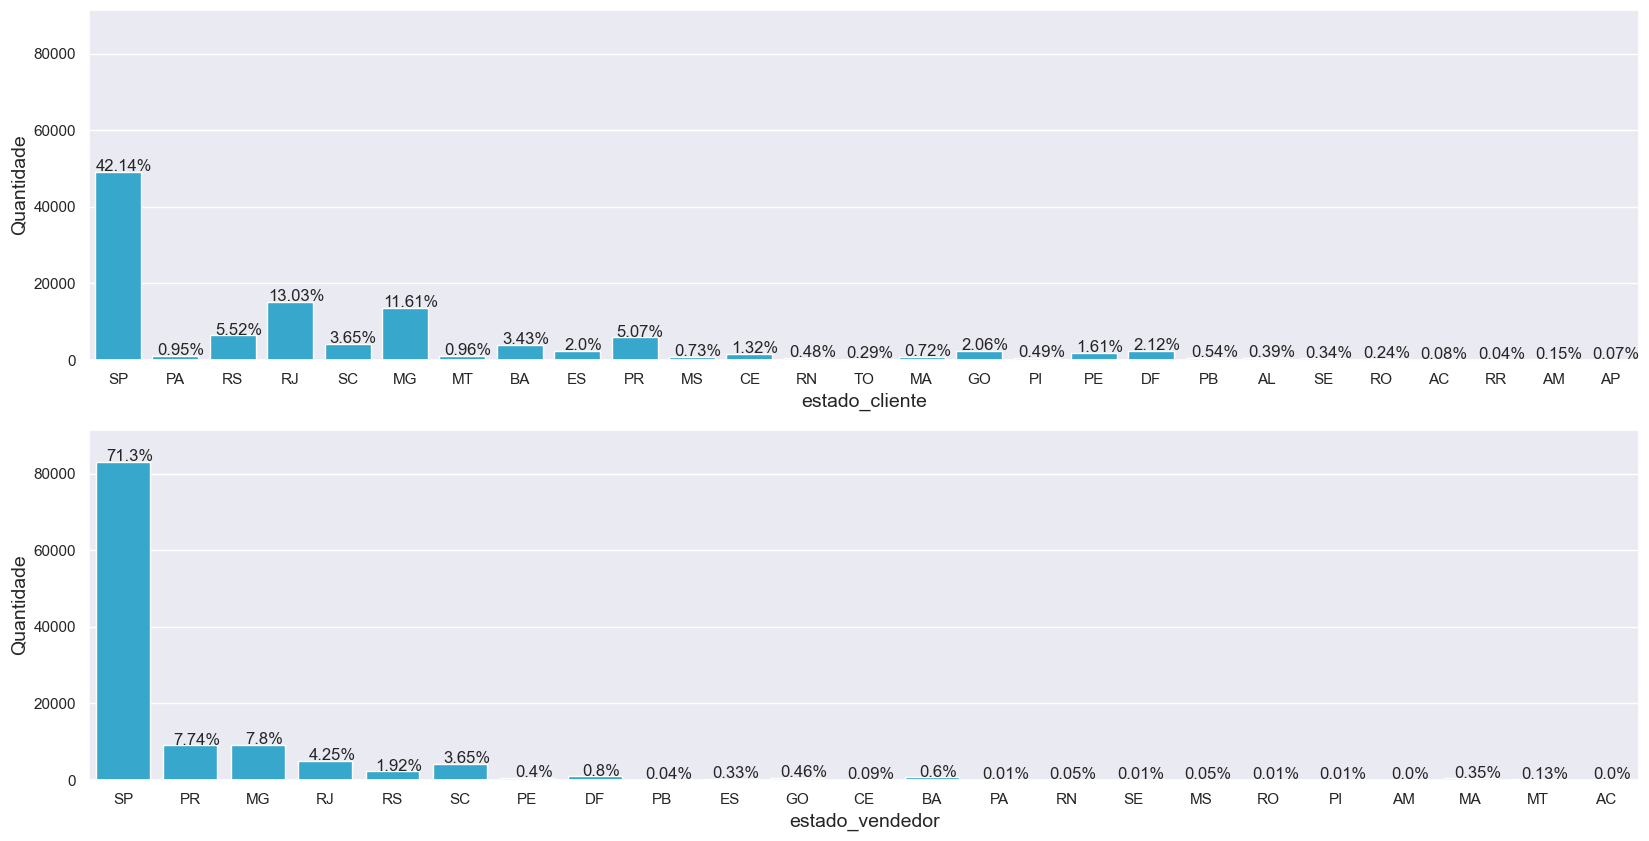

In [7]:
plota_barras(['estado_cliente', 'estado_vendedor'], False, df_raw, 2, 1)

#### 1. Há grande concentração de Clientes e Vendedores nas Regiões Sudeste (destaque para SP, RJ e MG) e Sul (destaque para PR, RS, SC)

## 2.2) Análise por Meio de Pagamento

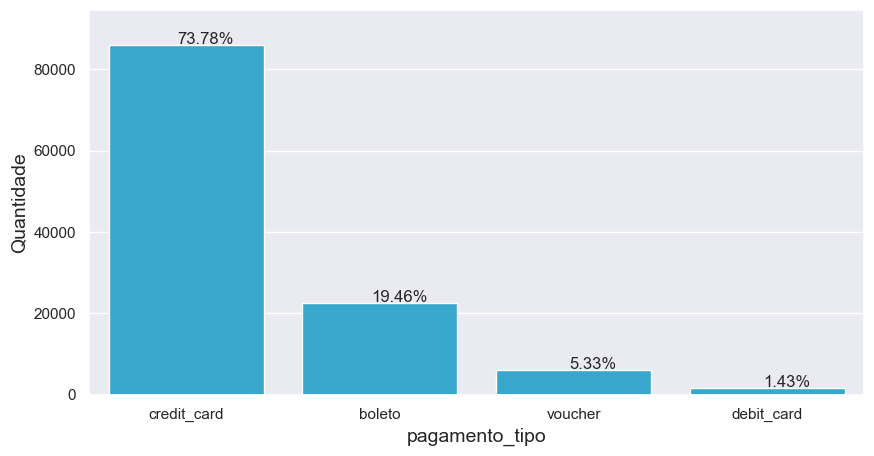

In [8]:
plota_barras(['pagamento_tipo'], False, df_raw, 1, 1)

#### 1. Grande domínio de compras via Cartão de Crédito e Boleto

# <font color='red' style='font-size: 40px;'> 3.0 Pré-Processamento </font>
<hr style='border: 2px solid red;'>

# <font color='red' style='font-size: 40px;'> 4.0 Aplicação de Modelos de Machine Learning </font>
<hr style='border: 2px solid red;'>

# <font color='red' style='font-size: 40px;'> 5.0 Consolidação dos Resultados </font>
<hr style='border: 2px solid red;'>